# Deep Learning Model

I basically take a pretrained model (MobileNet in this case) and add a few layers in order to determine 7 different conditions. I try to create a balanced training group and a realistic validation group to know if the model is learning anything useful.

In [1]:
import warnings # tf needs to learn to stfu
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029607.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029508.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030542.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033782.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029358.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031083.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033340.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034183.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033409.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033419.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030213.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032002.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032623.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031752.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033426.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030994.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034142.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030586.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032759.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032158.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032171.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032993.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030007.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031116.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033261.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030499.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030402.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030366.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032262.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032043.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032130.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029351.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028035.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026241.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027415.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024686.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025491.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027209.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026427.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027318.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025873.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026261.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028126.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027785.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027945.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027502.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025822.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025160.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024375.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027590.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026346.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025768.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028678.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027023.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0029283.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027310.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028227.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025300.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028572.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024601.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027101.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027469.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025751.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024480.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0025801.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026338.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029607.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029508.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030542.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033782.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029358.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031083.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033340.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0034183.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033067.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032627.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033399.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032931.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031255.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032707.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0034216.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033743.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033144.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033616.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031051.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033644.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031376.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031325.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030263.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030640.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029675.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032408.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030610.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032689.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0032899.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033510.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0034007.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0034164.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0030632.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029487.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0029681.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031239.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028035.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026241.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027415.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024686.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025491.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027209.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026427.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027318.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025873.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026261.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025119.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027341.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025753.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025373.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024838.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026685.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026635.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025354.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024609.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027797.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028130.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027850.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024757.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024932.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026684.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028305.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029002.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025834.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029135.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028923.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024440.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029274.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024799.jpg
/kaggle/input/skin-cancer-mn

In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
from skimage.io import imread as imread
from skimage.util import montage
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
from skimage.color import label2rgb
image_dir = Path('..') / 'input' / 'skin-cancer-mnist-ham10000'
mapping_file = Path('..') / 'input' / 'skin-images-to-features' / 'color_features.json'
skin_df = pd.read_json(mapping_file)
#skin_df['image_path'] = skin_df['image_path'].map(lambda x: image_dir / 'subset' / x) 
print(skin_df['image_path'].map(lambda x: Path(x).exists()).value_counts())
skin_df.sample(2)

True    9958
Name: image_path, dtype: int64


,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,dx_name,dx_id,color_features
6028,HAM_0001333,ISIC_0028948,nv,follow_up,35,female,trunk,../input/skin-cancer-mnist-ham10000/ham10000_i...,melanocytic nevi,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8401,HAM_0006296,ISIC_0028999,nv,histo,70,male,trunk,../input/skin-cancer-mnist-ham10000/ham10000_i...,melanocytic nevi,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Split up the groups so I can validate our model on something besides the direct training data

In [5]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(skin_df, 
                 test_size = 0.3, 
                  # hack to make stratification work                  
                 stratify = skin_df['dx_id'])
print(raw_train_df.shape[0], 'training masks')
print(valid_df.shape[0], 'validation masks')

6970 training masks
2988 validation masks


**Model Parameters**

In [6]:
GAUSSIAN_NOISE = 0.05
# number of validation images to use
VALID_IMG_COUNT = 1500
BASE_MODEL='MobileNet' # ['VGG16', 'RESNET52', 'InceptionV3', 'Xception', 'DenseNet169', 'DenseNet121']
IMG_SIZE = (224, 224) # [(224, 224), (384, 384), (512, 512), (640, 640)]
BATCH_SIZE = 64 # [1, 8, 16, 24]
DROPOUT = 0.5
DENSE_COUNT = 256
SAMPLE_PER_GROUP = 2200
LEARN_RATE = 2e-4
EPOCHS = 25
FLATTEN = True
RGB_FLIP = 1 # should rgb be flipped when rendering images

In [7]:
train_df = raw_train_df.\
     groupby('dx_name').\
     apply(lambda x: x.sample(SAMPLE_PER_GROUP//2, replace=True)).\
     reset_index(drop=True)
train_df.shape[0]

7700

**Prepare for Model**

In [8]:
from keras.preprocessing.image import ImageDataGenerator
if BASE_MODEL == 'MobileNet':
    from keras.applications.mobilenet_v2 import MobileNetV2 as PTModel, preprocess_input
elif BASE_MODEL=='VGG16':
    from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input
elif BASE_MODEL=='RESNET52':
    from keras.applications.resnet50 import ResNet50 as PTModel, preprocess_input
elif BASE_MODEL=='InceptionV3':
    from keras.applications.inception_v3 import InceptionV3 as PTModel, preprocess_input
elif BASE_MODEL=='Xception':
    from keras.applications.xception import Xception as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet169': 
    from keras.applications.densenet import DenseNet169 as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet121':
    from keras.applications.densenet import DenseNet121 as PTModel, preprocess_input
else:
    raise ValueError('Unknown model: {}'.format(BASE_MODEL))

Using TensorFlow backend.


In [9]:
from keras.preprocessing.image import ImageDataGenerator
dg_args = dict(featurewise_center = False, 
                  samplewise_center = False,
                  rotation_range = 45, 
                  width_shift_range = 0.1, 
                  height_shift_range = 0.1, 
                  shear_range = 0.01,
                  zoom_range = [0.9, 1.25],  
                  brightness_range = [0.7, 1.3],
                   
                  horizontal_flip = True, 
                  vertical_flip = False,
                  fill_mode = 'reflect',
                   data_format = 'channels_last',
              preprocessing_function = preprocess_input)

valid_args = dict(fill_mode = 'reflect',
                   data_format = 'channels_last',
                  preprocessing_function = preprocess_input)

core_idg = ImageDataGenerator(**dg_args)
valid_idg = ImageDataGenerator(**valid_args)

In [10]:
def flow_from_dataframe(img_data_gen, raw_df, path_col, y_col, **dflow_args):
    """Keras update makes this much easier"""
    in_df = raw_df.copy()
    in_df[path_col] = in_df[path_col].map(str)
    in_df[y_col] = in_df[y_col].map(lambda x: np.array(x))
    df_gen = img_data_gen.flow_from_dataframe(in_df, 
                                              x_col=path_col,
                                              y_col=y_col,
                                    class_mode = 'raw',
                                    **dflow_args)
    # posthoc correction
    df_gen._targets = np.stack(df_gen.labels, 0)
    return df_gen

In [11]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'image_path',
                            y_col = 'dx_id', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = BATCH_SIZE)

# used a fixed dataset for evaluating the algorithm
valid_x, valid_y = next(flow_from_dataframe(valid_idg, 
                               valid_df, 
                             path_col = 'image_path',
                            y_col = 'dx_id', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = VALID_IMG_COUNT)) # one big batch
print(valid_x.shape, valid_y.shape)

Found 7700 validated image filenames.
Found 2988 validated image filenames.
(1500, 224, 224, 3) (1500,)


x (64, 224, 224, 3) float32 -1.0 1.0
y (64,) int64 0 6


Text(0.5, 1.0, 'images')

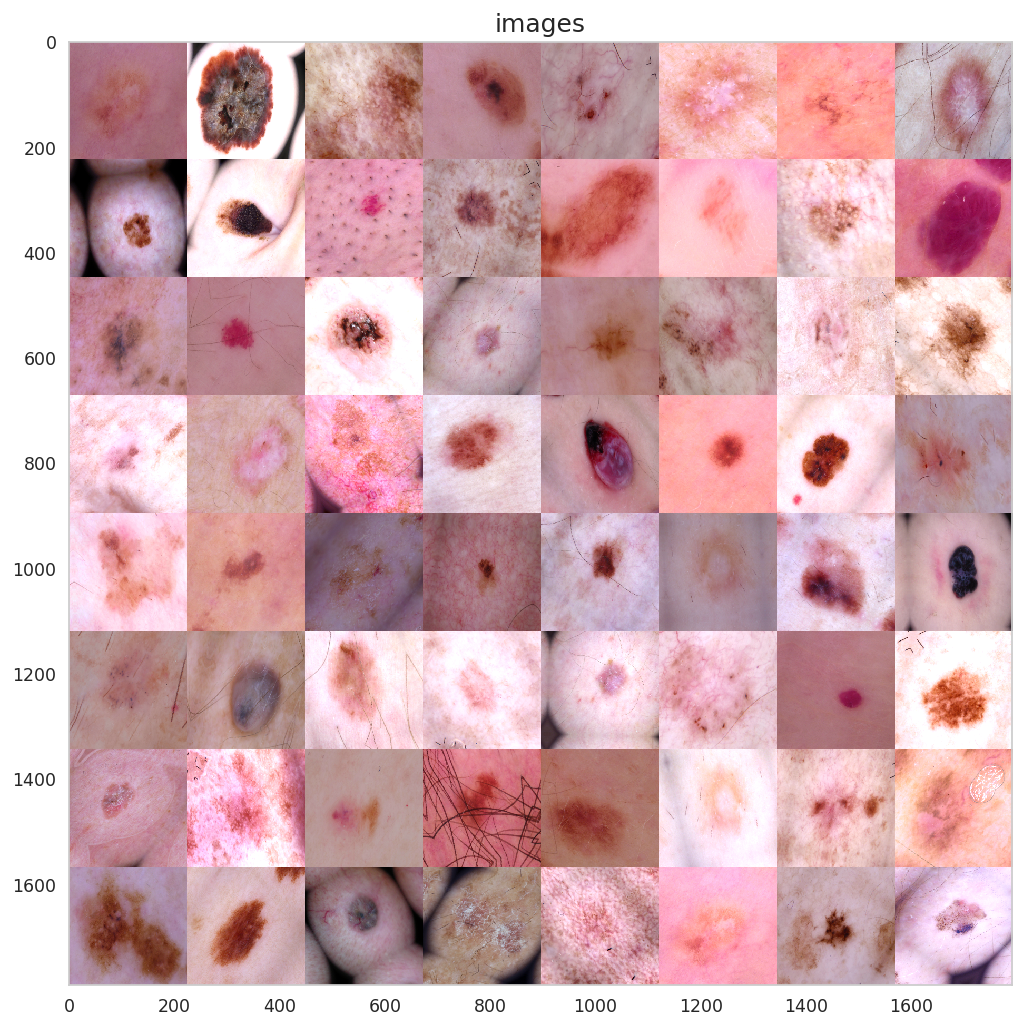

In [12]:
t_x, t_y = next(train_gen)
print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
fig, (ax1) = plt.subplots(1, 1, figsize = (10, 10))
ax1.imshow(montage_rgb((t_x-t_x.min())/(t_x.max()-t_x.min()))[:, :, ::RGB_FLIP])
ax1.set_title('images')

**Show the labels**

**Here I show the labels for the batch items and can see how frequent each one is.**

(array([10., 11.,  0., 10.,  0.,  6.,  6.,  0., 10., 11.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

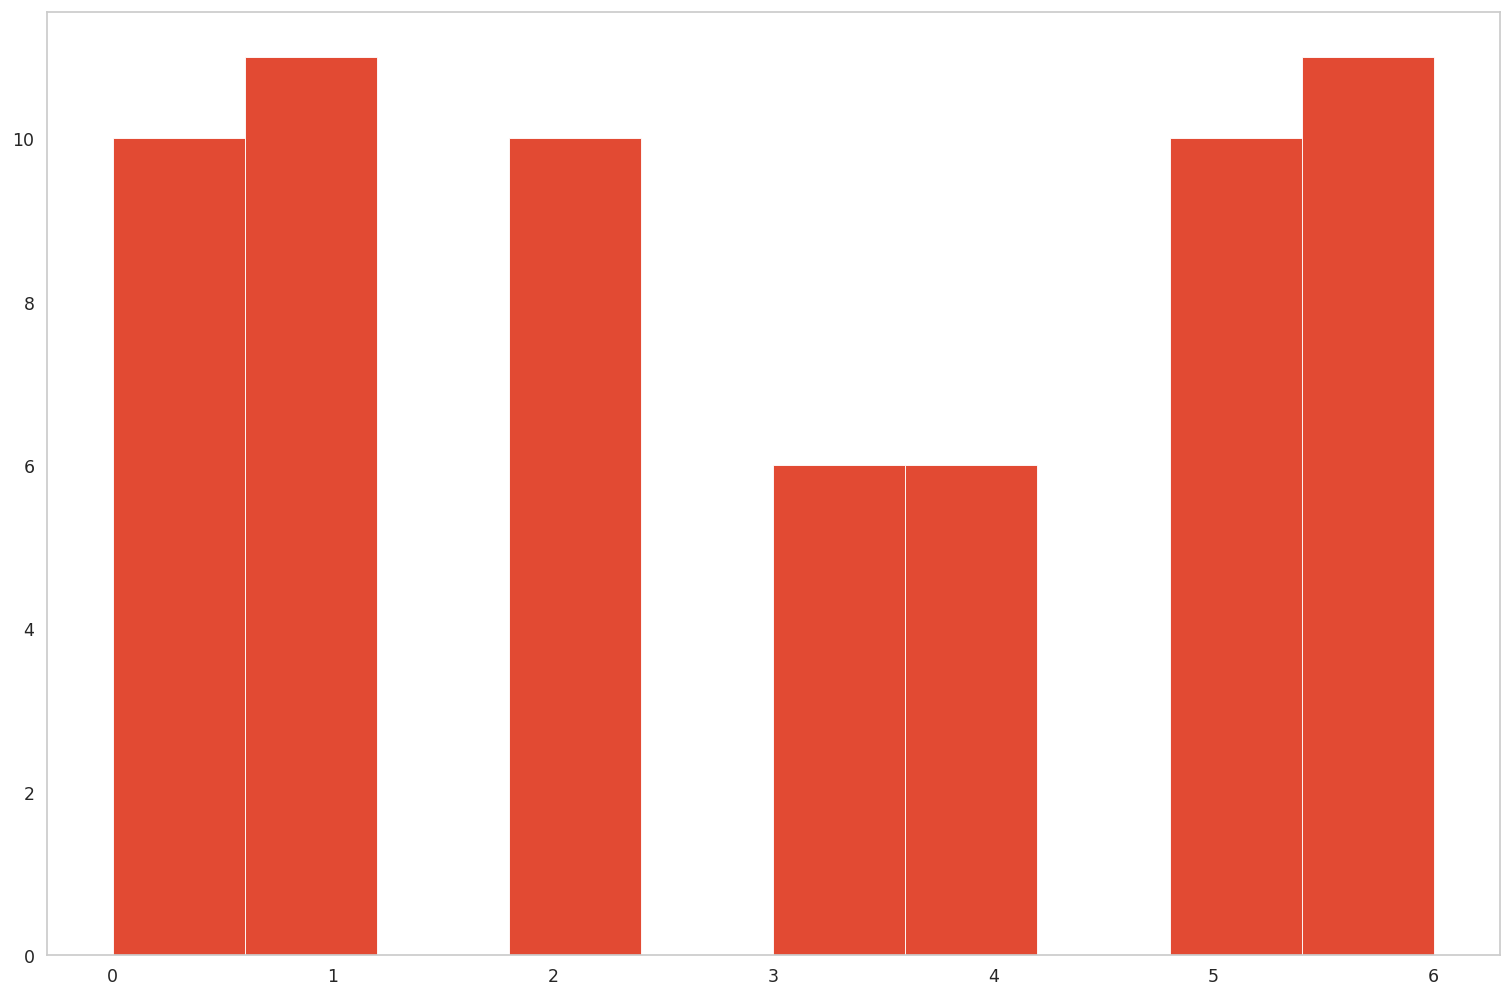

In [13]:
plt.hist(t_y.T)

**Build a Model**

In [14]:
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:], 
                              include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [15]:
from keras import models, layers
from keras.optimizers import Adam
img_in = layers.Input(t_x.shape[1:], name='Image_RGB_In')
img_noise = layers.GaussianNoise(GAUSSIAN_NOISE)(img_in)
pt_features = base_pretrained_model(img_noise)
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
bn_features = layers.BatchNormalization()(pt_features)
feature_dropout = layers.SpatialDropout2D(DROPOUT)(bn_features)
if FLATTEN:
    flat_layer = layers.Flatten()(bn_features)
    collapsed_layer = layers.Dropout(DROPOUT)(flat_layer)
else:
    collapsed_layer = layers.GlobalAvgPool2D()(bn_features)
dr_steps = layers.Dropout(DROPOUT)(layers.Dense(DENSE_COUNT, activation = 'relu')(collapsed_layer))
out_layer = layers.Dense(train_df['dx_id'].max()+1, activation = 'softmax')(dr_steps)

skin_model = models.Model(inputs = [img_in], outputs = [out_layer], name = 'full_model')

skin_model.compile(optimizer = Adam(lr=LEARN_RATE), 
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['sparse_categorical_accuracy'])

skin_model.summary()

Model: "full_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_RGB_In (InputLayer)    (None, 224, 224, 3)       0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 1280)        5120      
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('skin_cancer_detector')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
from IPython.display import clear_output
train_gen.batch_size = BATCH_SIZE
fit_results = skin_model.fit_generator(train_gen, 
                            steps_per_epoch = train_gen.samples//BATCH_SIZE,
                      validation_data = (valid_x, valid_y), 
                      epochs = EPOCHS, 
                      callbacks = callbacks_list,
                      workers = 3)
clear_output()

Epoch 1/25
 67/120 [===============>..............] - ETA: 1:42 - loss: 1.9749 - sparse_categorical_accuracy: 0.3473

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.plot(fit_results.history['loss'], label='Training')
ax1.plot(fit_results.history['val_loss'], label='Validation')
ax1.legend()
ax1.set_title('Loss')
ax2.plot(fit_results.history['sparse_categorical_accuracy'], label='Training')
ax2.plot(fit_results.history['val_sparse_categorical_accuracy'], label='Validation')
ax2.legend()
ax2.set_title('Binary Accuracy')
ax2.set_ylim(0, 1)

In [ ]:
skin_model.load_weights(weight_path)
skin_model.save('sklesion_img.h5')

In [ ]:
for k, v in zip(skin_model.metrics_names, 
        skin_model.evaluate(valid_x, valid_y)):
    if k!='loss':
        print('{:40s}:\t{:2.1f}%'.format(k, 100*v))

In [ ]:
dx_lookup_dict = train_df[['dx_name', 'dx_id']].drop_duplicates().set_index('dx_id').to_dict()['dx_name']

In [ ]:
t_x, t_y = next(train_gen)
t_yp = skin_model.predict(t_x)
fig, (m_axs) = plt.subplots(4, 4, figsize = (20, 20))
for i, c_ax in enumerate(m_axs.flatten()):
    c_ax.imshow(((t_x[i]-t_x.min())/(t_x.max()-t_x.min()))[:, ::RGB_FLIP])
    c_title = '{}\nPred: {:2.1f}%'.format(dx_lookup_dict[t_y[i]], 100*t_yp[i, t_y[i]])
    c_ax.set_title(c_title)
    c_ax.axis('off')

**Validation Data Results**

**Here I show the results on validation data**

In [ ]:
t_x, t_y = valid_x, valid_y
t_yp = skin_model.predict(t_x, batch_size=8, verbose=True)
fig, (m_axs) = plt.subplots(4, 4, figsize = (20, 20))
for i, c_ax in enumerate(m_axs.flatten()):
    c_ax.imshow(((t_x[i]-t_x.min())/(t_x.max()-t_x.min()))[:, ::RGB_FLIP])
    c_title = '{}\nPred: {:2.1f}%'.format(dx_lookup_dict[t_y[i]], 100*t_yp[i, t_y[i]])
    c_ax.set_title(c_title)
    c_ax.axis('off')

**Detailed Performance by group**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
skin_conditions = [dx_lookup_dict[k][:20] for k in range(len(dx_lookup_dict))]
t_y_ohe = ohe.fit_transform(t_y.reshape(-1, 1))
pred_df = pd.concat([
    pd.DataFrame(t_yp, columns=skin_conditions).assign(source='Prediction').assign(id=range(t_yp.shape[0])),
    pd.DataFrame(t_y_ohe, columns=skin_conditions).assign(source='Ground-truth').assign(id=range(t_yp.shape[0]))
])
flat_pred_df = pd.melt(pred_df, id_vars=['source', 'id']).pivot_table(index=['id', 'variable'], columns='source', values='value').reset_index()
flat_pred_df['Ground-truth'] = flat_pred_df['Ground-truth'].map(lambda x: 'Positive' if x>0.5 else 'Negative')
sns.catplot(data=flat_pred_df, x='Ground-truth', y='Prediction', col='variable', kind='swarm',  col_wrap=4)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
sns.swarmplot(data=flat_pred_df, hue='Ground-truth', y='Prediction', x='variable', size=2.0, ax=ax1)

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(data=flat_pred_df, hue='Ground-truth', y='Prediction', x='variable', ax=ax1)

**Class-level ROC curves**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i, c_all in enumerate(skin_conditions):
    tpr, fpr, thresh = roc_curve(y_true=t_y_ohe[:, i], y_score=t_yp[:, i])
    auc_roc = roc_auc_score(y_true=t_y_ohe[:, i], y_score=t_yp[:, i])
    ax1.plot(tpr, fpr, '.-', label='{} (AUC:{:2.1%})'.format(c_all, auc_roc), lw=2)
ax1.legend()

**Export the Model**

In [ ]:
skin_model.get_input_at(0), skin_model.get_output_at(0)